In [ ]:
Sales Prediction Using Python

In [ ]:
Author: NDOU MPHO ALPHEUS

In [ ]:
Domain: Data Science

In [ ]:
Batch: June

In [ ]:
Task: Sales Prediction Using Python

In [ ]:
Aim: To forecast the amount of a product that customers will purchase based on various factors such as advertising expenditure, 
target audience segmentation,and advertising platform selection.

Import Libraries and Load Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = r"C:\Users\ndoum\Downloads\advertising.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [ ]:
Data Preprocessing

In [3]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values or drop rows/columns with missing values
# For simplicity, let's drop rows with missing values
data = data.dropna()

# Display summary statistics of the dataset
print(data.describe())


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


Exploratory Data Analysis (EDA)

C:\Users\ndoum\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


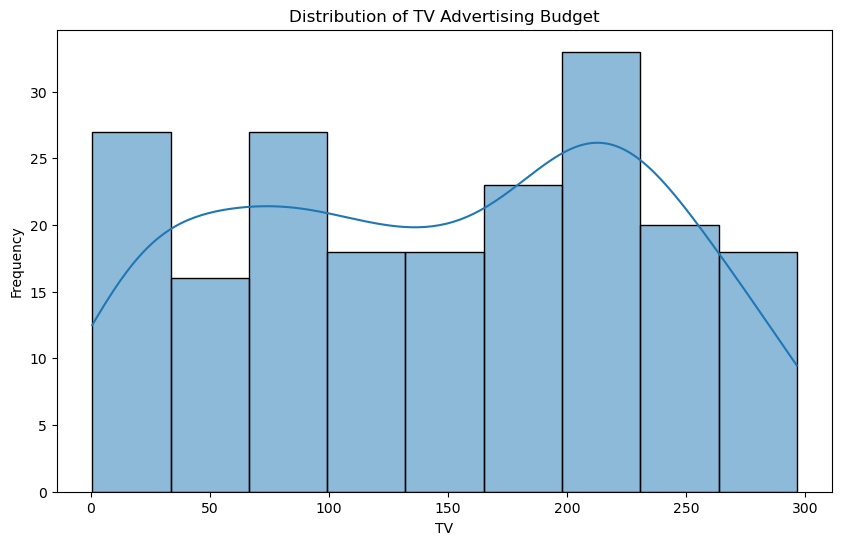

C:\Users\ndoum\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


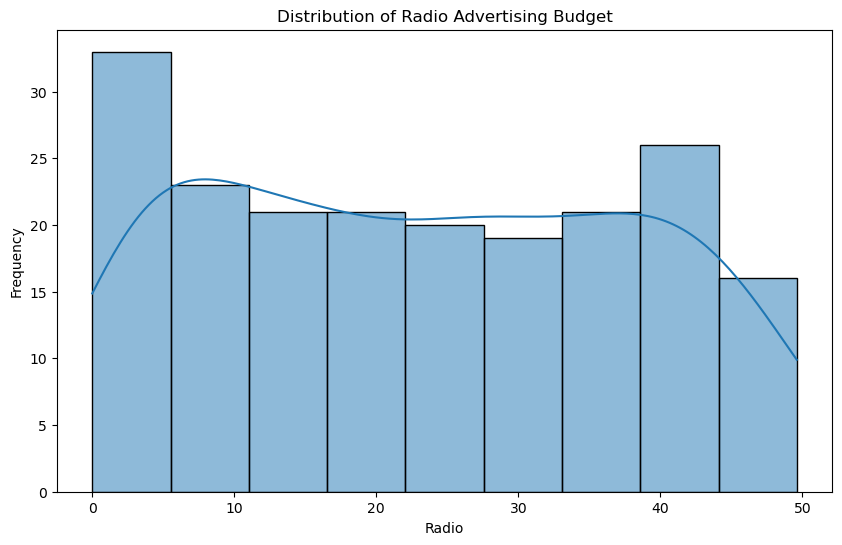

C:\Users\ndoum\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


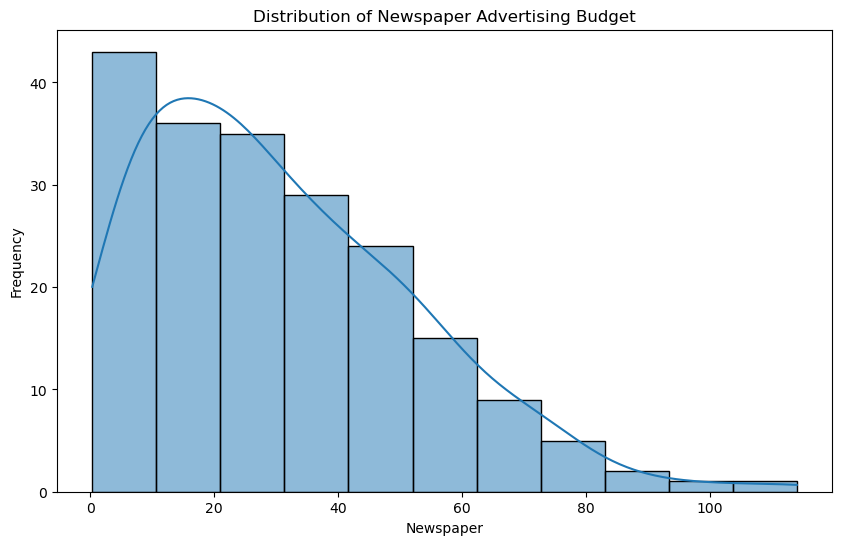

C:\Users\ndoum\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


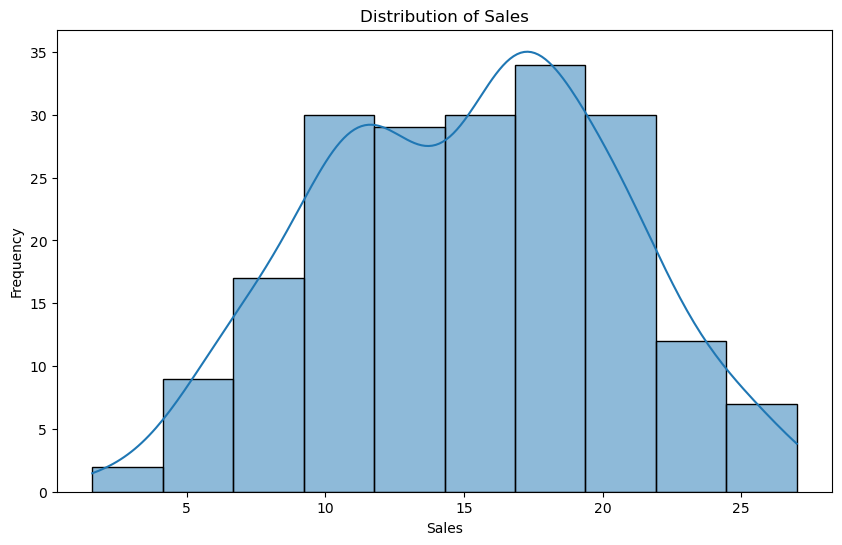

C:\Users\ndoum\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ndoum\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ndoum\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ndoum\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

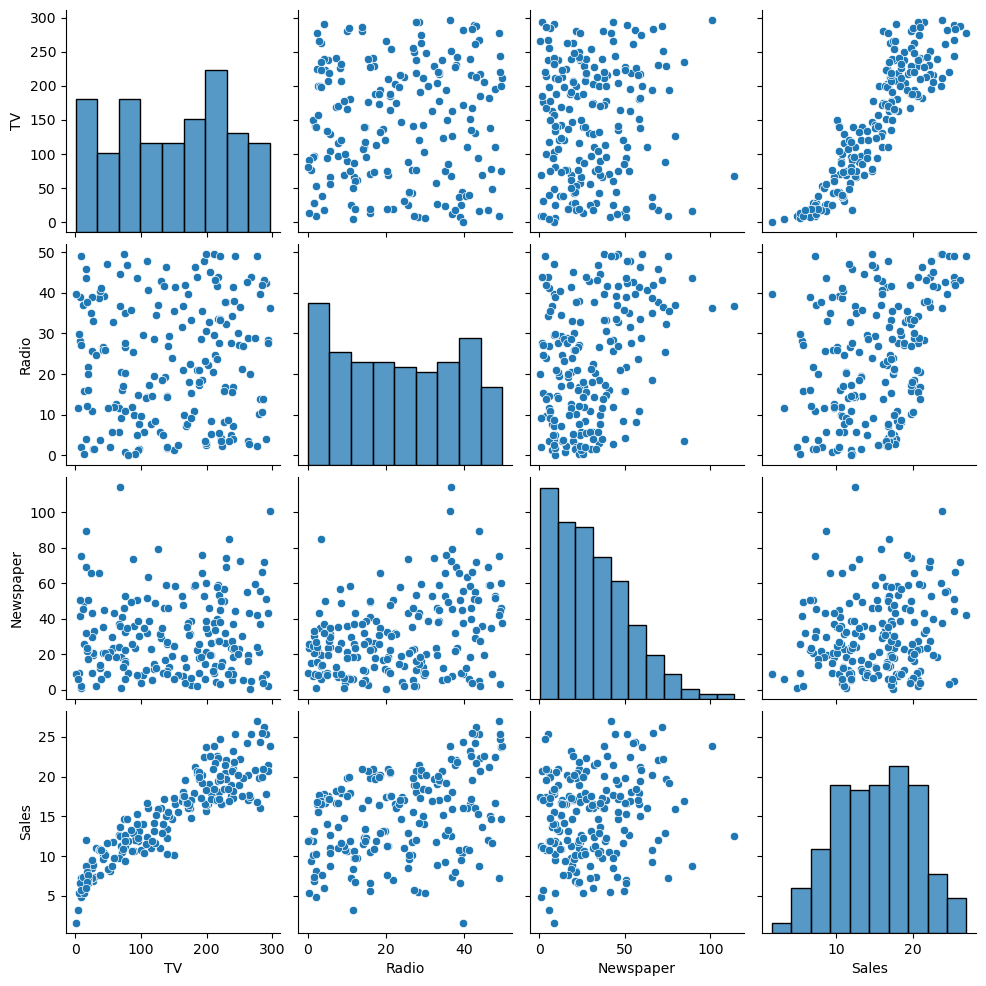

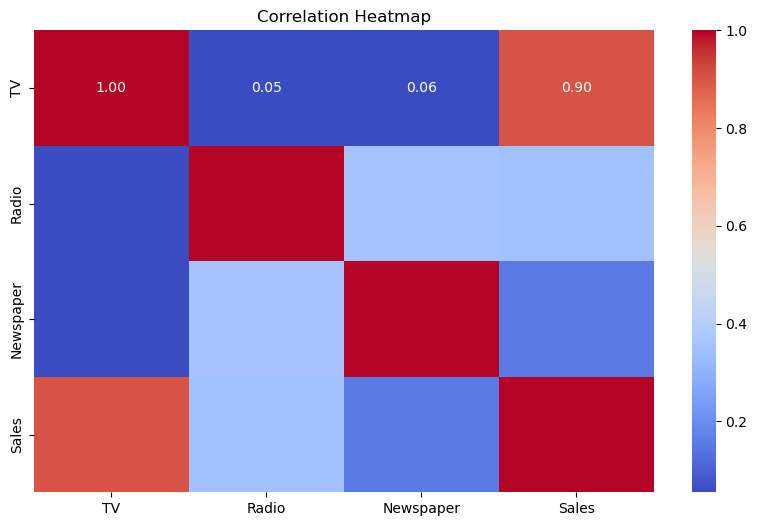

In [4]:
# Visualize the distribution of numerical features
plt.figure(figsize=(10, 6))
sns.histplot(data['TV'], kde=True)
plt.title('Distribution of TV Advertising Budget')
plt.xlabel('TV')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['Radio'], kde=True)
plt.title('Distribution of Radio Advertising Budget')
plt.xlabel('Radio')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['Newspaper'], kde=True)
plt.title('Distribution of Newspaper Advertising Budget')
plt.xlabel('Newspaper')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Visualize the relationships between features and the target
sns.pairplot(data)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
corr = data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()


Split Data

In [5]:
# Define the features (X) and the target variable (y)
X = data.drop('Sales', axis=1)  
y = data['Sales']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Training set shape: {X_train.shape}, {y_train.shape}')
print(f'Testing set shape: {X_test.shape}, {y_test.shape}')

Training set shape: (140, 3), (140,)
Testing set shape: (60, 3), (60,)


 Train Model

In [6]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

Evaluate Model

In [6]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 2.541624036229147
R-squared: 0.9091484341849799


Visualize Results using a Scatter Plot

In [ ]:
# Plot the true vs. predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.legend()
plt.show()


Visualize Results using residuals Plot

C:\Users\ndoum\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


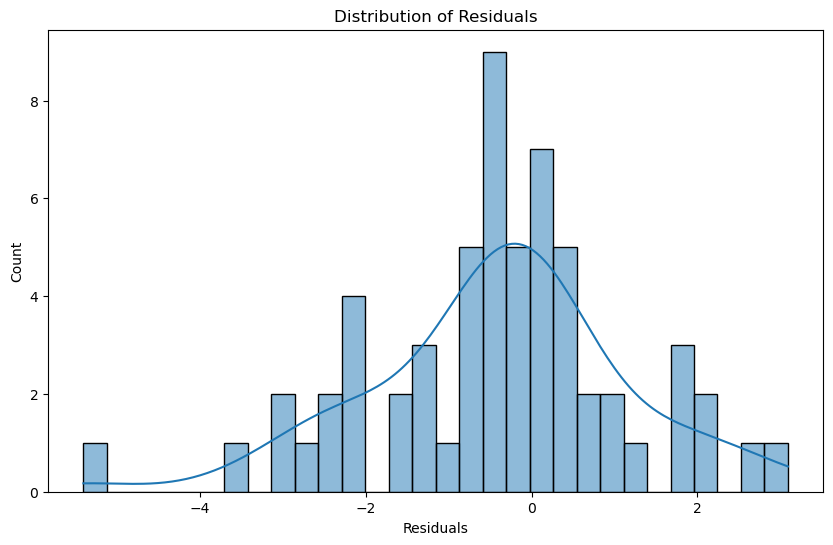

In [9]:
# Plot the residuals
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

### Conclusion
In this project, I built a linear regression model to predict sales based on advertising budgets across TV, radio, and newspapers. Through exploratory data analysis (EDA), I identified relationships between these features and sales.My model achieved an R-squared value of 0.9091, indicating the proportion of variance in sales explained by the model. This analysis provides insights into how different advertising channels impact sales.
